Import the necessary packages

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

Import the training dataset and get the number of observations

In [2]:
train_election20 = pd.read_csv('https://raw.githubusercontent.com/ctkrall/stat6289/main/election2020.csv', skiprows=1) #pandas dataset skipping the column name row in csv file
train_election20.columns = ['state', 'countyID', 'precnum', 'party','pper','ssper'] #redefine the column names

print(len(train_election20)) #get input dimension

# build a tensor with the 2 numeric columns 'pper' and 'ssper'-- note the square brackets inside the parens
# this creates a 2-dimensional tensor
trainset = torch.tensor([train_election20['pper'].values, train_election20['ssper'].values])

trainset1 = torch.transpose(trainset, 0, 1) #creates a 3986 dimensional tensor

#print(trainset)
#print(trainset1)

3986


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


In [3]:
trainloader = torch.utils.data.DataLoader(trainset1, batch_size = 32, num_workers=2)

import the test dataset

In [15]:
election16 = pd.read_csv('https://raw.githubusercontent.com/ctkrall/stat6289/main/election2016.csv', skiprows=103) #pandas dataset skipping the column name row in csv file
election16.columns = ['state', 'countyID', 'precnum', 'party','pper','ssper'] #redefine the column names

print(len(election16)) #get input dimension

# build a tensor with the 2 numeric columns 'pper' and 'ssper'-- note the square brackets inside the parens
# this creates a 2-dimensional tensor
testset = torch.tensor([election16['pper'].values, election16['ssper'].values])

testset1 = torch.transpose(testset, 0, 1) #creates a 3986 dimensional tensor


3986


In [16]:
testloader = torch.utils.data.DataLoader(testset1, num_workers=2)

Define the neural network: a fully connected model with one hidden layer and a dropout rate of 50%

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x)) #hidden layer 1
        out = torch.sigmoid(self.fc2(x)) #hidden layer 2

        return out


net = Net()
net = net.float()

Train the model over 2 epochs using backpropogation

In [5]:
import torch.optim as optim

In [6]:
criterion = nn.MSELoss()
criterion2 = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [7]:
losses = []
runningloss = 0.0
epochnum = 10

for epochs in range(epochnum):
  for i, data in enumerate(trainloader, 0):
    pres, ssen = data[0]
    pres2 = (pres.unsqueeze(dim=0))/100
    ssen2 = (ssen.unsqueeze(dim = 0))/100
    #print(ssen2)
    
    outputs = net.forward(pres2.float())
    loss = criterion(outputs, ssen2.float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    runningloss += abs(loss.item())
  losses.append(runningloss/3986)
  runningloss = 0.0

print('Finished Training')

Finished Training


In [12]:
PATH = './MSEnet.pth'
torch.save(net.state_dict(), PATH)

In [8]:
losses2 = []
runningloss2 = 0.0

for epochs in range(epochnum):
  for i, data in enumerate(trainloader, 0):
    pres, ssen = data[0]
    pres2 = (pres.unsqueeze(dim=0))/100
    ssen2 = (ssen.unsqueeze(dim = 0))/100
    #print(ssen2)
    
    outputs = net.forward(pres2.float())
    loss = criterion2(outputs, ssen2.float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    runningloss2 += abs(loss.item())
  losses2.append(runningloss2/3986)
  runningloss2 = 0.0

print('Finished Training')

Finished Training


Graph the loss vs the epoch to see if the model converges

Text(0.5, 0, 'Epoch')

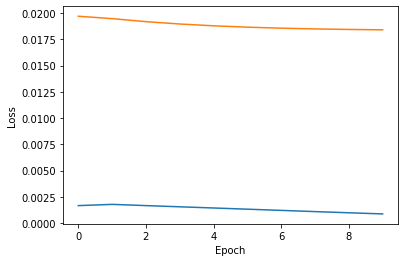

In [11]:

plt.plot(range(epochnum), losses)
plt.plot(range(epochnum), losses2)
plt.ylabel("Loss")
plt.xlabel("Epoch")

compare the model to the test data set

In [18]:
dataiter = iter(testloader)
for data in testloader:
    pres, ssen = data[0]
    pres2 = (pres.unsqueeze(dim=0))/100
    ssen2 = (ssen.unsqueeze(dim = 0))/100



In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [20]:
outputs = net(pres2.float())

In [23]:
testloss = []
testrunloss = 0.0

with torch.no_grad():
  for epoch in range(epochnum):
    for data in testloader:
      pres, ssen = data[0]
      pres2 = (pres.unsqueeze(dim=0))/100
      ssen2 = (ssen.unsqueeze(dim = 0))/100
    
      outputs = net.forward(pres2.float())
      loss = criterion(outputs, ssen2.float())
      testrunloss += abs(loss.item())
    testloss.append(testrunloss/3986)
    testrunloss = 0.0
    

[0.010175438508618542, 0.010175438508618542, 0.010175438508618542, 0.010175438508618542, 0.010175438508618542, 0.010175438508618542, 0.010175438508618542, 0.010175438508618542, 0.010175438508618542, 0.010175438508618542]


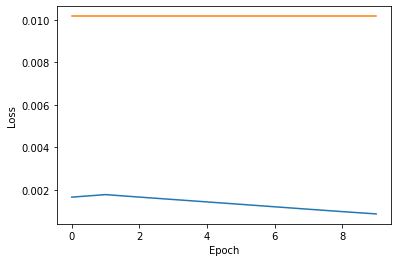

In [27]:
plt.plot(range(epochnum), losses)
plt.plot(range(epochnum), testloss)

plt.ylabel("Loss")
plt.xlabel("Epoch")

print(testloss)